In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Projects/DS\ 203/Course \Project

/content/gdrive/MyDrive/Projects/DS 203/Course Project


In [ ]:
! pip install pymatreader

In [ ]:
from pymatreader import read_mat
import pandas as pd

In [ ]:
ev_data_b0005 = read_mat('Battery Degradation Data/B0005.mat')
ev_data_b0006 = read_mat('Battery Degradation Data/B0006.mat')
ev_data_b0007 = read_mat('Battery Degradation Data/B0007.mat')
ev_data_b0018 = read_mat('Battery Degradation Data/B0018.mat')

In [ ]:
df_ev_data_b0005 = pd.DataFrame(ev_data_b0005['B0005']['cycle'])
df_ev_data_b0006 = pd.DataFrame(ev_data_b0006['B0006']['cycle'])
df_ev_data_b0007 = pd.DataFrame(ev_data_b0007['B0007']['cycle'])
df_ev_data_b0018 = pd.DataFrame(ev_data_b0018['B0018']['cycle'])

In [ ]:
df_ev_data_b0005.head(20)

,type,ambient_temperature,time,data
0,charge,24,"[2008.0, 4.0, 2.0, 13.0, 8.0, 17.921]","{'Voltage_measured': [3.873017221300996, 3.479..."
1,discharge,24,"[2008.0, 4.0, 2.0, 15.0, 25.0, 41.593]","{'Voltage_measured': [4.191491807505295, 4.190..."
2,charge,24,"[2008.0, 4.0, 2.0, 16.0, 37.0, 51.984]","{'Voltage_measured': [3.3250546568448542, 3.00..."
3,discharge,24,"[2008.0, 4.0, 2.0, 19.0, 43.0, 48.406]","{'Voltage_measured': [4.189773213846608, 4.188..."
4,charge,24,"[2008.0, 4.0, 2.0, 20.0, 55.0, 40.812]","{'Voltage_measured': [3.3526036599987754, 3.03..."
5,discharge,24,"[2008.0, 4.0, 3.0, 0.0, 1.0, 6.687]","{'Voltage_measured': [4.188186735991303, 4.187..."
6,charge,24,"[2008.0, 4.0, 3.0, 1.0, 12.0, 38.671]","{'Voltage_measured': [3.378798976512954, 3.066..."
7,discharge,24,"[2008.0, 4.0, 3.0, 4.0, 16.0, 37.375]","{'Voltage_measured': [4.188461118855572, 4.187..."
8,charge,24,"[2008.0, 4.0, 3.0, 5.0, 27.0, 49.125]","{'Voltage_measured': [3.372870917439266, 3.063..."
9,discharge,24,"[2008.0, 4.0, 3.0, 8.0, 33.0, 25.703]","{'Voltage_measured': [4.188298524761055, 4.187..."


In [ ]:
charge = df_ev_data_b0005[df_ev_data_b0005['type'] == 'charge']
discharge = df_ev_data_b0005[df_ev_data_b0005['type'] == 'discharge']
impedance = df_ev_data_b0005[df_ev_data_b0005['type'] == 'impedance']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
cycles = [0, 40, 80, 120, 160]

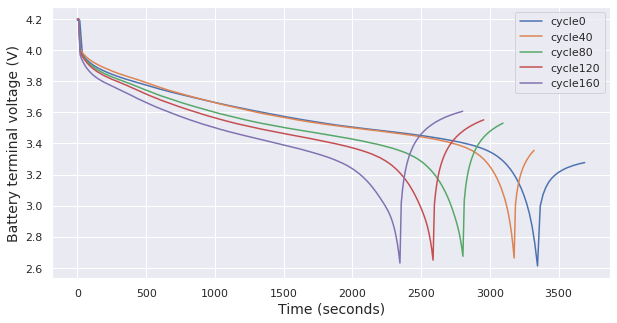

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Battery terminal voltage (V)', fontsize=14)

for cycle in cycles:
  plt.plot(discharge.iloc[cycle]['data']['Time'], 
           discharge.iloc[cycle]['data']['Voltage_measured'], label=f'cycle{cycle}')

plt.legend()

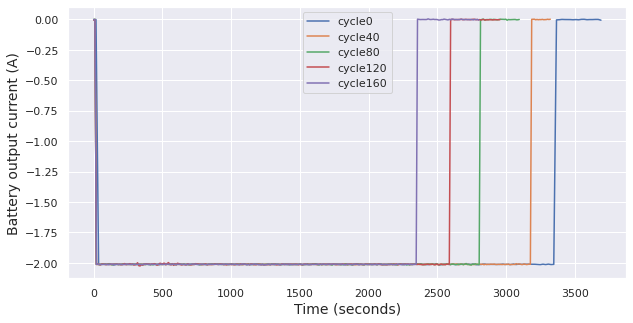

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Battery output current (A)', fontsize=14)

for cycle in cycles:
  plt.plot(discharge.iloc[cycle]['data']['Time'], 
           discharge.iloc[cycle]['data']['Current_measured'], label=f'cycle{cycle}')

plt.legend()

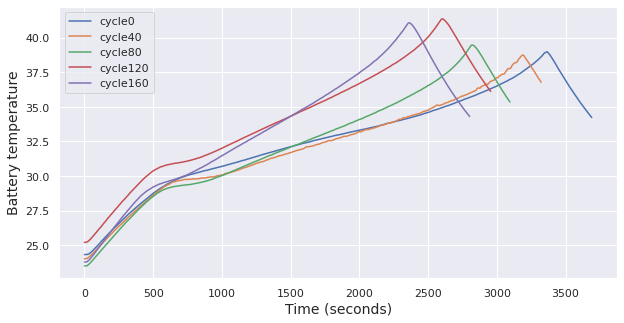

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Battery temperature', fontsize=14)

for cycle in cycles:
  plt.plot(discharge.iloc[cycle]['data']['Time'], 
           discharge.iloc[cycle]['data']['Temperature_measured'], label=f'cycle{cycle}')

plt.legend()

In [ ]:
voltages = np.linspace(2.7, 4, num=16)
# Times at which terminal voltage is 2.7, ..., 4
features = [[discharge.iloc[i]['data']['Time'][np.argmin(np.abs(discharge.iloc[i]['data']['Voltage_measured'] - voltages[j]))] for j in range(len(voltages))] 
            for i in range(len(discharge))]

In [ ]:
# Feature 1 - Time to reach minimum terminal voltage
feature1 = [discharge.iloc[j]['data']['Time'][np.argmin(discharge.iloc[j]['data']['Voltage_measured'])] for j in range(len(discharge))]

In [ ]:
# Feature 2 - Maximum temperature
# Feature 3 - Time to reach maximum temperature
feature2 = [np.max(discharge.iloc[j]['data']['Temperature_measured']) for j in range(len(discharge))]
feature3 = [discharge.iloc[j]['data']['Time'][np.argmax(discharge.iloc[j]['data']['Temperature_measured'])] for j in range(len(discharge))]

In [ ]:
X = np.array(features)
feature1 = np.array(feature1)
feature1 = feature1[:, np.newaxis]

feature2 = np.array(feature2)
feature2 = feature2[:, np.newaxis]

feature3 = np.array(feature3)
feature3 = feature3[:, np.newaxis]

In [ ]:
X = np.hstack((X, feature1, feature2, feature3))

In [ ]:
y = np.array([discharge.iloc[i]['data']['Capacity'] for i in range(len(discharge))])
y.shape

(168,)

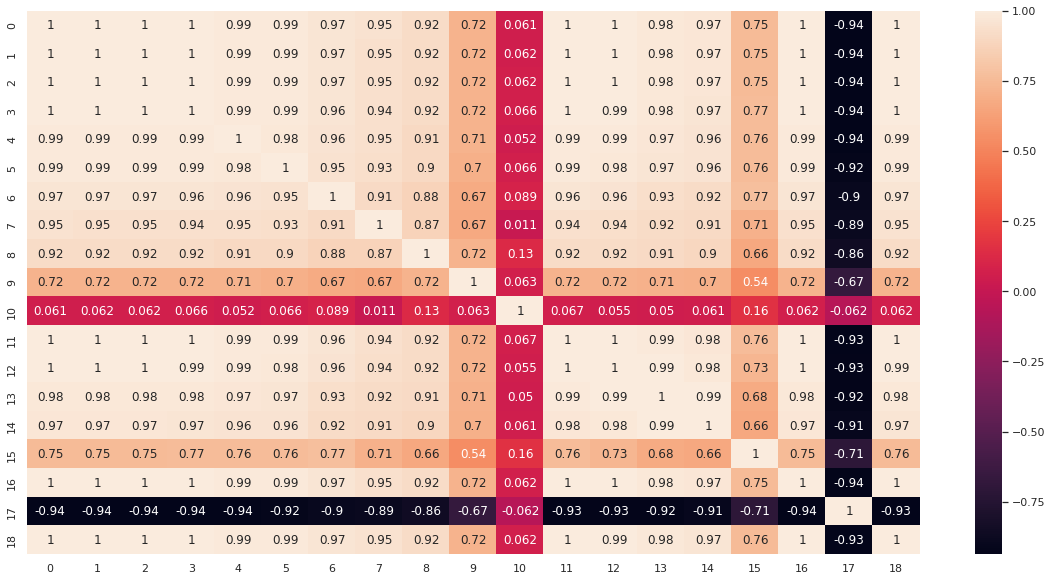

In [ ]:
# Plot a correlation matrix to determine if there are any redundancies
corr = pd.DataFrame(X).corr()

# Plotting a heatmap between continuous variables
plt.figure(figsize=(20,10))
ax = sns.heatmap(corr, 
                 xticklabels=corr.columns,
                 yticklabels=corr.columns,
                 annot=True)

In [ ]:
# Import some additional libraries for ML tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
# Split the data in the ratio 80:20 for training, testing respectively
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, train_size=0.8)

# Standardize the training data
scaler = StandardScaler()

# Fit the scaler to X_train
scaler.fit(X_train_1)

# Transform the entire data using the computed mean and variance
X_train_1 = scaler.transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

8 components are sufficient to satisfy the RMSE reconstruction criterion


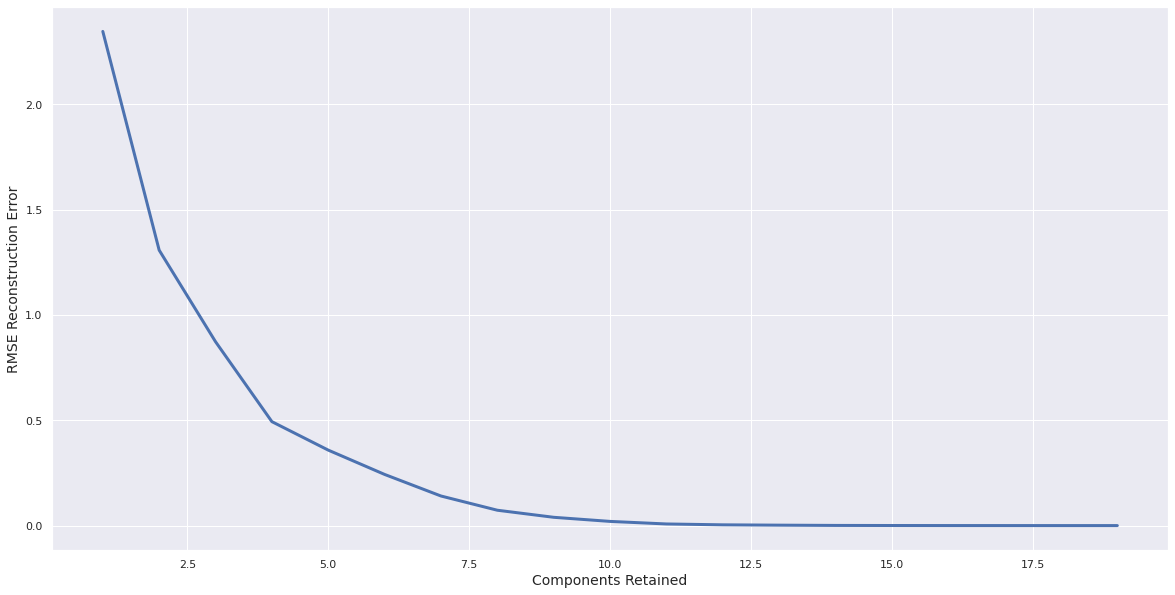

In [ ]:
# Import the module for PCA
from sklearn.decomposition import PCA

# Re-centre the data to have zero mean
X_for_pca = X_train_1 - np.mean(X_train_1, axis=0)[np.newaxis, :]

# Compute std. deviation of L2 norm input vectors
l2_norm = np.sum(X_for_pca ** 2, axis=-1)
std_dev = np.std(l2_norm)

# Threshold for dimensionality reduction is 1% of std. deviation
threshold = 0.01 * std_dev

rmse_vs_components = [] # List of RMSE vs n_components for plotting
desired_components = 19 # Start by assuming all components are necessary

# Iterate over number of retained dimensions
for n_components in range(1, 20):
  pca = PCA(n_components=n_components)

  # Fit PCA onto the input data
  pca.fit(X_for_pca)

  # Apply dimensionality reduction on X
  X_transformed = pca.transform(X_for_pca)

  # Transform back to the starting space to compute reconstruction error
  X_projected = pca.inverse_transform(X_transformed)

  # Compute RMSE reconstruction error
  rmse = np.sum((X_for_pca - X_projected) ** 2, axis=-1).mean()

  if rmse < threshold:
    desired_components = min(n_components, desired_components)

  rmse_vs_components.append(rmse)

# Plot RMSE vs Components Retained
plt.figure(figsize=(20, 10))

plt.xlabel('Components Retained', fontsize=14)
plt.ylabel('RMSE Reconstruction Error', fontsize=14)
plt.plot(np.arange(1, 20), rmse_vs_components, lw=3)

print(desired_components, "components are sufficient to satisfy the RMSE reconstruction criterion")

In [ ]:
n_components = desired_components # Sufficient dimensions after compression

# PCA with 8 retained dimensions
pca = PCA(n_components=n_components)
pca.fit(X_for_pca)

X_train_1 = pca.transform(X_train_1)
X_test_1 = pca.transform(X_test_1)

# Print the shape for confirmation
print(X_train_1.shape)
print(X_test_1.shape) 

(134, 8)
(34, 8)


In [ ]:
# Train a SVR model on the dataset
# Define a SVM regressor with a Gaussian kernel
svr = SVR()

# Train the model
svr.fit(X_train_1, y_train_1)

# Test the model returning mean accuracy
# print(svr.predict(X_test_1))
print(svr.score(X_test_1, y_test_1))

mse = mean_squared_error(svr.predict(X_test_1), y_test_1)
rmse = np.sqrt(mse)
print(rmse)

0.8876423740514471
0.05852827189769499


In [ ]:
# Define a regressor with 1 hidden layer
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=200)

# Train the model
mlp.fit(X_train_1, y_train_1)

# Test the model returning mean accuracy
# print(mlp.predict(X_test_1))
print(mlp.score(X_test_1, y_test_1))

mse = mean_squared_error(mlp.predict(X_test_1), y_test_1)
rmse = np.sqrt(mse)
print(rmse)

0.7840755432569224
0.08113632672163443


In [ ]:
# Define a random forest classifier
regressor = RandomForestRegressor(n_estimators=100)

# Train the model
regressor.fit(X_train_1, y_train_1)

# Test the model returning mean accuracy
# print(regressor.predict(X_test_1))
print(regressor.score(X_test_1, y_test_1))

mse = mean_squared_error(regressor.predict(X_test_1), y_test_1)
rmse = np.sqrt(mse)
print(rmse)

0.9934274411053755
0.014155710342440507


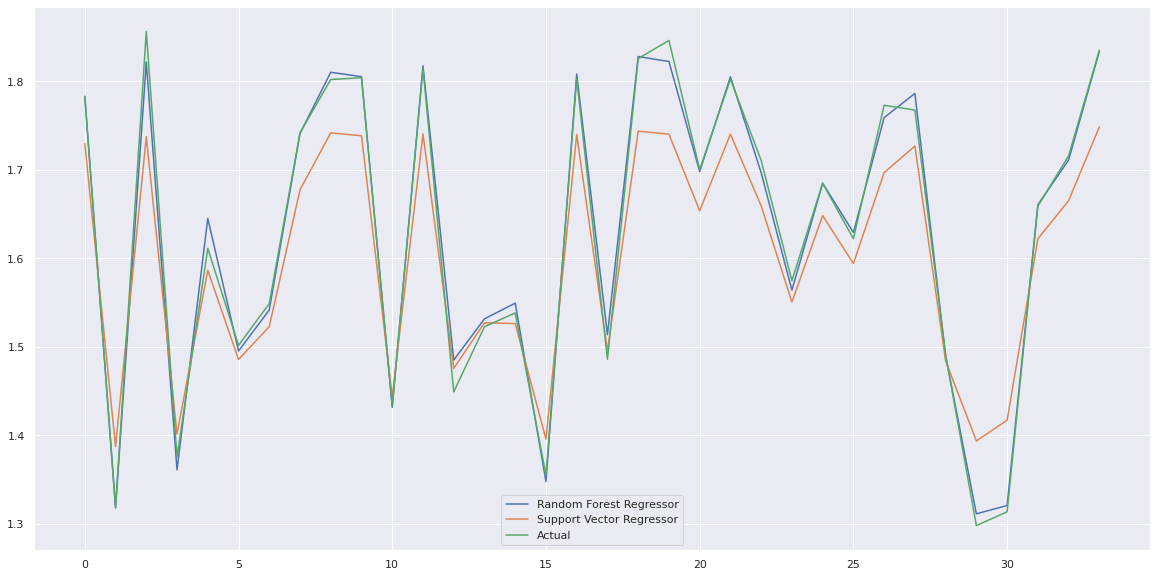

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(regressor.predict(X_test_1), label='Random Forest Regressor')
plt.plot(svr.predict(X_test_1), label='Support Vector Regressor')
plt.plot(y_test_1.reshape(-1,1), label='Actual')

plt.legend()

In [ ]:
charge = df_ev_data_b0006[df_ev_data_b0006['type'] == 'charge']
discharge = df_ev_data_b0006[df_ev_data_b0006['type'] == 'discharge']
impedance = df_ev_data_b0006[df_ev_data_b0006['type'] == 'impedance']

In [ ]:
voltages = np.linspace(2.7, 4, num=16)
# Times at which terminal voltage is 2.7, ..., 4
features = [[discharge.iloc[i]['data']['Time'][np.argmin(np.abs(discharge.iloc[i]['data']['Voltage_measured'] - voltages[j]))] for j in range(len(voltages))] for i in range(len(discharge))]

In [ ]:
# Feature 1 - Time to reach minimum terminal voltage
feature1 = [discharge.iloc[j]['data']['Time'][np.argmin(discharge.iloc[j]['data']['Voltage_measured'])] for j in range(len(discharge))]

In [ ]:
# Feature 2 - Maximum temperature
# Feature 3 - Time to reach maximum temperature
feature2 = [np.max(discharge.iloc[j]['data']['Temperature_measured']) for j in range(len(discharge))]
feature3 = [discharge.iloc[j]['data']['Time'][np.argmax(discharge.iloc[j]['data']['Temperature_measured'])] for j in range(len(discharge))]

In [ ]:
X = np.array(features)
feature1 = np.array(feature1)
feature1 = feature1[:, np.newaxis]

feature2 = np.array(feature2)
feature2 = feature2[:, np.newaxis]

feature3 = np.array(feature3)
feature3 = feature3[:, np.newaxis]

In [ ]:
X = np.hstack((X, feature1, feature2, feature3))

In [ ]:
y = np.array([discharge.iloc[i]['data']['Capacity'] for i in range(len(discharge))])
y.shape

(168,)

In [ ]:
# Transform the entire data using the computed mean and variance
X = scaler.transform(X)

In [ ]:
X = pca.transform(X)

In [ ]:
print(svr.score(X, y))

mse = mean_squared_error(svr.predict(X), y)
rmse = np.sqrt(mse)
print(rmse)

0.6747465831918313
0.14331133072407987


In [ ]:
print(mlp.score(X, y))

mse = mean_squared_error(mlp.predict(X), y)
rmse = np.sqrt(mse)
print(rmse)

0.6303789731567013
0.15277346524569152


In [ ]:
print(regressor.score(X, y))

mse = mean_squared_error(regressor.predict(X), y)
rmse = np.sqrt(mse)
print(rmse)

0.8979179673383344
0.08028681866212516


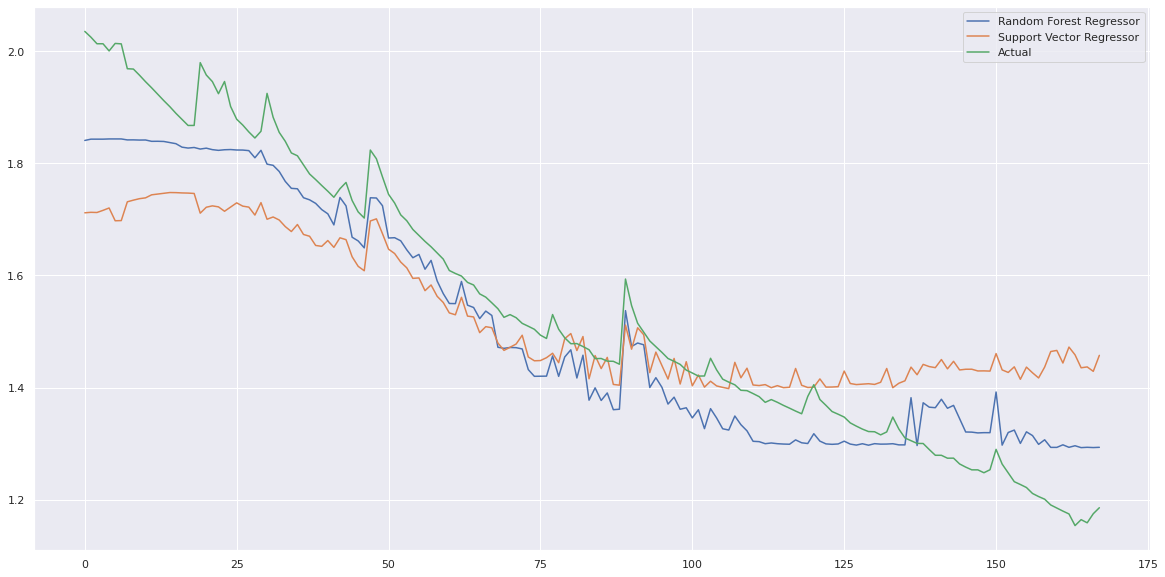

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(regressor.predict(X), label='Random Forest Regressor')
plt.plot(svr.predict(X), label='Support Vector Regressor')
plt.plot(y.reshape(-1,1), label='Actual')

plt.legend()